In [10]:
from skimage.transform import resize
import matplotlib.pyplot as plt
import logicRegression
import pandas as pd
import numpy as np
import utils

imgDir = './images/resized/'
imgSize = 82944
saveDataFilePath = 'savedTrainingData.bin'

labels= pd.read_csv('labels_final.csv')
loadedData = utils.loadFromeFile(saveDataFilePath)
w = loadedData['w']
b = loadedData['b']
preDictStart = 0
preDictEnd = 200

assert(preDictEnd - preDictStart > 0)

predictArray = np.array(labels)[preDictStart:preDictEnd,:]
# preDictArray = labels.iloc[preDictStart:preDictEnd, :]
predicSetX = []

for row in predictArray:
    img = plt.imread(imgDir + str(row[0]) + '.jpg')
    if imgSize != img.size:
        raise ValueError("图片尺寸不一致")
    imgArray = np.array(img)
    imgTrans = imgArray.reshape((1, img.size)).T
    predicSetX.append(imgTrans)

predicSetX = np.array(predicSetX).squeeze().T

predictResult = logicRegression.predict(loadedData["w"], loadedData["b"], predicSetX).astype(int)

predictArray = np.hstack([predictArray, predictResult.T])
predictArray[:,1] -= predictArray[:,2]
badCaseCount = np.count_nonzero(predictArray[:,1:2])
# print(predictArray)
print('predict count: %d' % (preDictEnd - preDictStart))
print('bad case count: %d' % badCaseCount)
print('predict accuracy: %.2f %%' % (100 - np.mean(np.abs(predictArray[:,1:2])) * 100))

# badCaseArray = predictArray[predictArray[1] != 0]

badCaseArray = np.delete(predictArray, np.where(predictArray[:, 1] == 0)[0], axis=0)

predict count: 200
bad case count: 48
predict accuracy: 76.00 %


c:\Dev\kilomelo\nncourse_exercise\Course_1\week2\logicRegression.py:15: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-1.0 * z))


13 x 4
bad case:


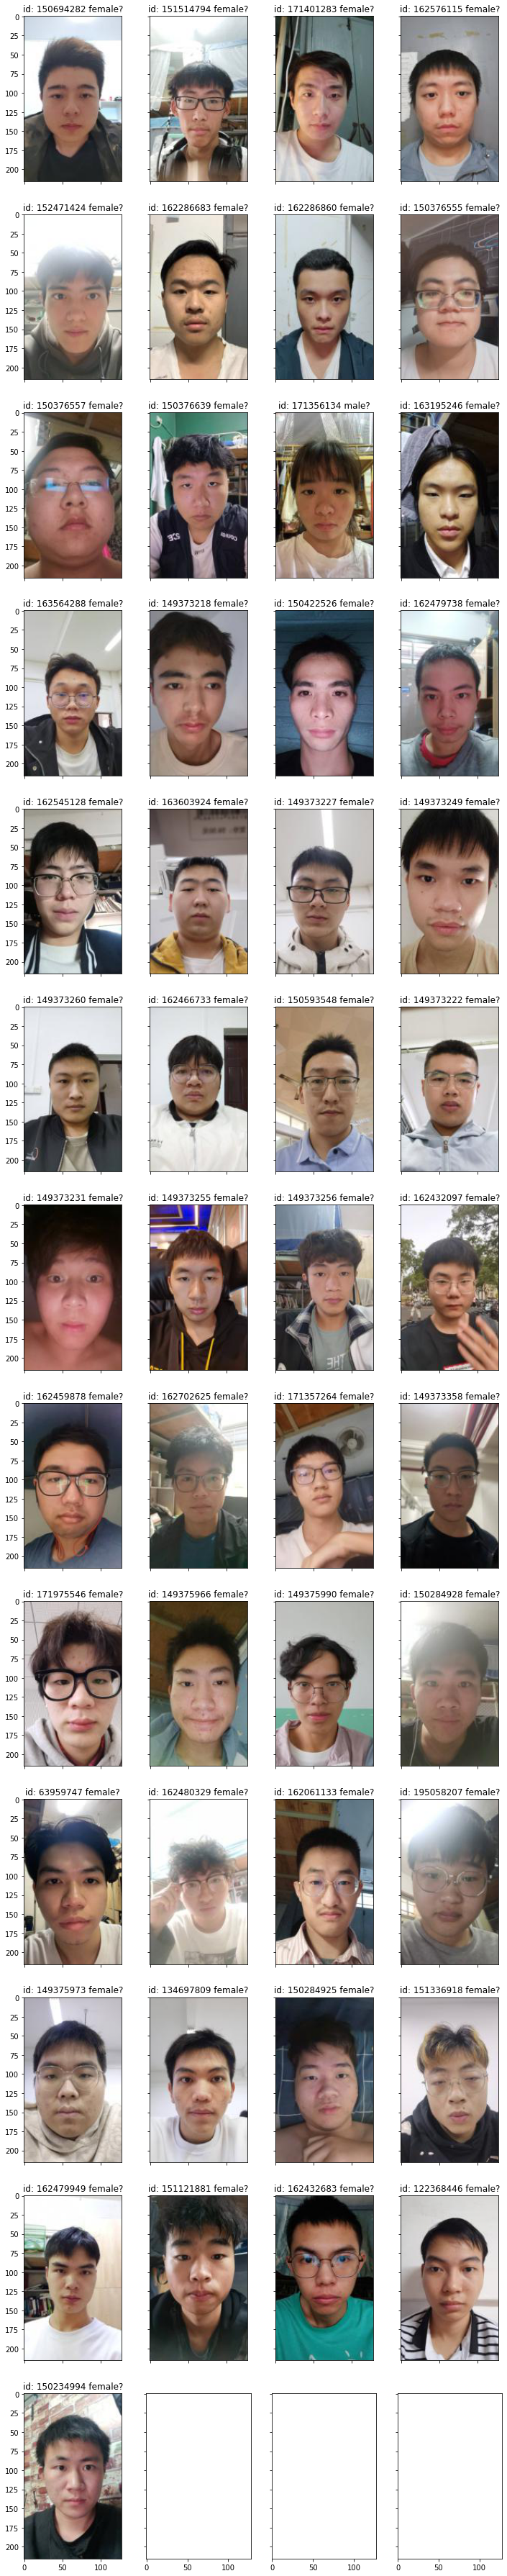

In [7]:
import math

showImgColumnLimit = 4
columnCnt = min(showImgColumnLimit, badCaseCount)
rowCnt = math.ceil(badCaseCount / columnCnt)
print(rowCnt, 'x', columnCnt)

plt.rcParams['figure.figsize'] = [3 * columnCnt, 5 * rowCnt]
plt.rcParams['figure.dpi'] = 72



print('bad case:')
fig, axis = plt.subplots(rowCnt, columnCnt, sharex=True, sharey=True)

for i in range(rowCnt):
    for j in range(columnCnt):
        idx = i * columnCnt + j
        if idx >= badCaseArray.shape[0]: break
        img = plt.imread(imgDir + str(badCaseArray[idx, 0]) + '.jpg')
        axis[i, j].imshow(img)
        axis[i, j].set_title('id: {} {}'.format(badCaseArray[idx, 0], ('female?' if badCaseArray[idx, 2] == 0 else 'male?')))

